In [1]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
from Calc import open_model, save
import matplotlib.pyplot as plt

#from Parameters import Params
from scipy.signal import find_peaks
from matplotlib.animation import FuncAnimation
from scipy.ndimage import zoom
from PIL import Image
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128


In [ ]:
Omega =  np.linspace(omega_0*0.9, omega_0*1.2, 100)
Params['Omega'] = [Omega[0], Omega[-1], len(Omega)]
Params['Packing'] = 'Rectangle'
Params['Orientations'] = 'zyx'
Params['N'], Params['shape'] = to3D(15, 15, 15, 'zyx')
Params['Solver_type'] = 'Straight'
save('DATALowTol', Params)




Packing <function Rectangle_packing at 0x0000021A74EAD080>
Количество колец: {'z': 3600, 'y': 3600, 'x': 3600}
Rectangle_NoGrad_15x15x15_zyx_Straight
C [4.70000000e-08 4.65060079e-08 4.60120158e-08 ... 4.05781027e-08
 4.00841106e-08 3.95901186e-08]
Phi_0z: [1. 1. 1. ... 0. 0. 0.]
Matrix forming


100%|██████████| 10800/10800 [24:10<00:00,  7.45it/s] 


Matrix: Done
Straight solving (Voltage)


  0%|          | 0/100 [00:00<?, ?it/s]

[[ 2.96558009e-02+5.14413945e-04j  2.15853392e-02+2.66714229e-04j
   1.80591404e-02+1.86673736e-04j ...  1.03792365e-05+1.38485564e-05j
   5.87111461e-04+1.94042625e-05j  6.84901827e-04+1.57515785e-05j]
 [ 3.07130249e-02+5.49337355e-04j  2.21622582e-02+2.80099255e-04j
   1.84866474e-02+1.94806686e-04j ...  3.86447519e-05+1.73049185e-05j
   6.29197194e-04+2.13914134e-05j  7.21174237e-04+1.69720573e-05j]
 [ 3.18351613e-02+5.87418984e-04j  2.27644330e-02+2.94463906e-04j
   1.89300020e-02+2.03401777e-04j ...  7.41823295e-05+2.16780607e-05j
   6.75333931e-04+2.36197900e-05j  7.60008489e-04+1.83123298e-05j]
 ...
 [-2.53010363e-02+2.74639157e-04j -3.04378558e-02+5.81277918e-04j
  -3.34884792e-02-2.70180184e-04j ... -5.14214929e-04-1.34135811e-04j
  -4.02709670e-04+8.91276051e-04j  2.79211525e-03-1.01876643e-03j]
 [-2.49837154e-02+2.74127946e-04j -2.99072682e-02+4.47285800e-04j
  -3.30790408e-02+2.45879270e-04j ... -5.44987269e-04-3.48953550e-05j
  -1.55764165e-04+2.73518976e-04j  2.45376708e-

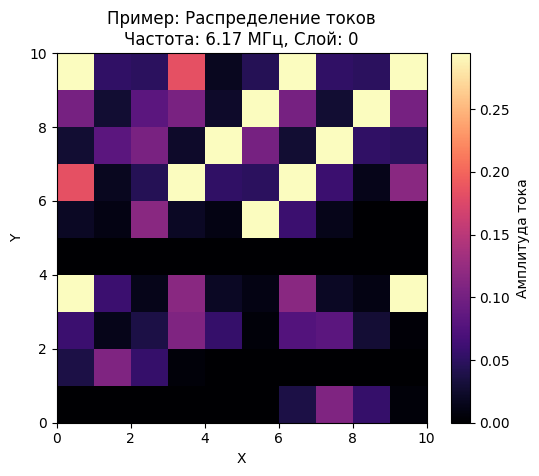

C:\Users\AndreyMatvey\AppData\Local\Temp\ipykernel_18544\1480361196.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Imaginary part of polarisation')

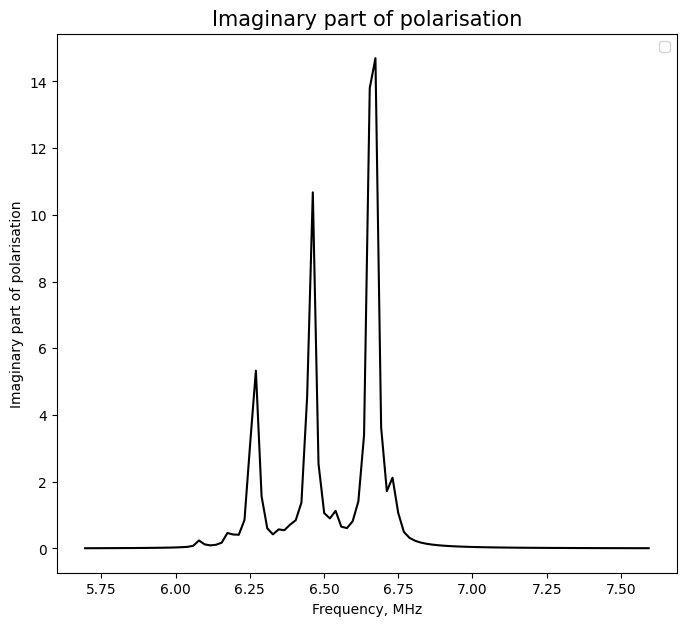

In [6]:
def plot_interpolated_current_distribution(currents, freq_index, layer_index, frequencies, title_prefix=""):

    current_at_freq = currents[freq_index]
    print('current_at_freq', current_at_freq)
    
    layer_currents_flat = current_at_freq[layer_index * 100 : (layer_index + 1) * 100]
    layer_currents_matrix = layer_currents_flat.reshape((10, 10))
    
    current_magnitude = np.abs(layer_currents_matrix)
    
    print('layer_current_matrix', layer_currents_matrix)
    print('current_magnitude', current_magnitude)
    
    interpolated_currents = zoom(current_magnitude, zoom=100, order=3)
    
    plt.imshow(current_magnitude, cmap='magma', extent=[0, 10, 0, 10])
    plt.colorbar(label="Амплитуда тока")
    plt.title(f"{title_prefix}Распределение токов\nЧастота: {frequencies[freq_index]:.2f} МГц, Слой: {layer_index}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


data = open_model('DATALowTol', Params, Currents=True)
currents = data['Currents']
frequencies = data['Omega'] / (2 * np.pi * 1e6)
ImagPolarisation = data['Polarization'][:, 0].imag

print(currents)

print(len(frequencies))

layer_index = 0
freq_index = 25

plot_interpolated_current_distribution(currents, freq_index, layer_index, frequencies, title_prefix="Пример: ")

fig_pol, ax_pol = plt.subplots(figsize = (8, 7))
plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, color = 'black')
#mark = ax_pol.axvline(Omega[0]/2/np.pi/1e6, color = 'red', linestyle = '--', label = 'Current frequency')
plt.xlabel('Frequency, MHz')
plt.ylabel('Imaginary part of polarisation')
plt.legend()
plt.title('Imaginary part of polarisation', fontsize = 15)
#plt.savefig('imag_pol_cube_10x10x10_grad')


MovieWriter imagemagick unavailable; using Pillow instead.


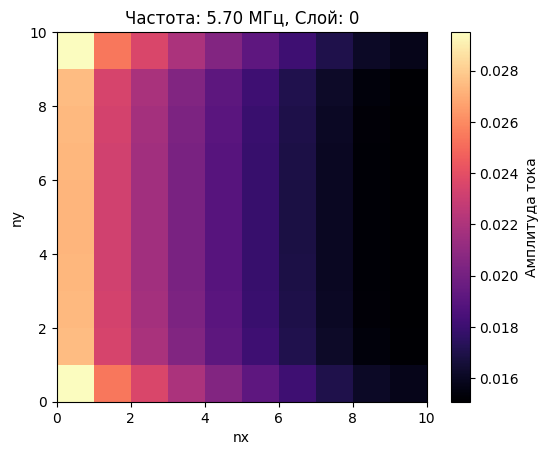

In [5]:
def gif_current_distribution(currents, freq_index, layer_index, frequencies, ax, title_prefix=""):
    current_at_freq = currents[freq_index]
    layer_currents_flat = current_at_freq[layer_index * 100 : (layer_index + 1) * 100]
    layer_currents_matrix = layer_currents_flat.reshape((10, 10))
    current_magnitude = np.abs(layer_currents_matrix)
    #interpolated_currents = zoom(current_magnitude, zoom=100, order=3)

    ax.clear()
    cax = ax.imshow(current_magnitude, cmap='magma', interpolation='nearest', extent=[0, 10, 0, 10])
    ax.set_title(f"{title_prefix}Частота: {frequencies[freq_index]:.2f} МГц, Слой: {layer_index}")
    ax.set_xlabel("nx")
    ax.set_ylabel("ny")
    return cax

data = open_model('DATALowTol', Params, Currents=True)
currents = data['Currents']
frequencies = data['Omega'] / (2 * np.pi * 1e6)
ImagPolarisation = data['Polarization'][:, 0].imag

layer_index = 0
freq_indices = range(0, len(frequencies), 1)

fig, ax = plt.subplots()

cax = gif_current_distribution(currents, freq_indices[0], layer_index, frequencies, ax, title_prefix="Анимация: ")
fig.colorbar(cax, ax=ax, label="Амплитуда тока")

def update(freq_index):
    ax.clear()
    cax = gif_current_distribution(currents, freq_index, layer_index, frequencies, ax)
    return cax,

ani = FuncAnimation(fig, update, frames=freq_indices, blit=False)

HTML(ani.to_jshtml())

ani.save(f'{"current_distribution_cube_10x10x10_grad_Straight"}.gif', writer='imagemagick', fps=20)

In [ ]:
def gif_current_distribution(currents, freq_index, layer_index, frequencies, ax, title_prefix=""):
    current_at_freq = currents[freq_index]
    layer_currents_flat = current_at_freq[layer_index * 2500 : (layer_index + 1) * 2500]
    layer_currents_matrix = layer_currents_flat.reshape((50, 50))
    current_magnitude = np.abs(layer_currents_matrix)
    #interpolated_currents = zoom(current_magnitude, zoom=100, order=3)

    ax.clear()
    cax = ax.imshow(current_magnitude, cmap='magma', interpolation='nearest', extent=[0, 50, 0, 50])
    ax.set_title(f"{title_prefix}Частота: {frequencies[freq_index]:.2f} МГц, Слой: {layer_index}")
    ax.set_xlabel("nx")
    ax.set_ylabel("ny")
    return cax

data = open_model('DATALowTol', Params, Currents=True)
currents = data['Currents']
frequencies = data['Omega'] / (2 * np.pi * 1e6)
ImagPolarisation = data['Polarization'][:, 0].imag

layer_index = 0
freq_indices = range(0, len(frequencies), 1)

fig, ax = plt.subplots()

cax = gif_current_distribution(currents, freq_indices[0], layer_index, frequencies, ax, title_prefix="Анимация: ")
fig.colorbar(cax, ax=ax, label="Амплитуда тока")

def update(freq_index):
    ax.clear()
    cax = gif_current_distribution(currents, freq_index, layer_index, frequencies, ax)
    return cax,

ani = FuncAnimation(fig, update, frames=freq_indices, blit=False)

HTML(ani.to_jshtml())

ani.save(f'{"current_distribution_flat_1x50x50_no_grad"}.gif', writer='imagemagick', fps=20)